In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")


In [3]:
df_train.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
df_test.head(5)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [5]:
# Overview of the dataset
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None


In [6]:
print(df_train.isnull().sum())

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


In [7]:
df_train=df_train.dropna()
df_train.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [8]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df_train['is_weekend'] = df_train['day_of_week'].isin([5, 6]).astype(int)

# Aggregate sales by year, month, and weekday
print(df_train.groupby('year')['num_sold'].sum())
print(df_train.groupby('month')['num_sold'].mean())
print(df_train.groupby('day_of_week')['num_sold'].mean())


year
2010    22134393.0
2011    26171899.0
2012    24709710.0
2013    25509417.0
2014    24570658.0
2015    21883106.0
2016    21524273.0
Name: num_sold, dtype: float64
month
1     763.121159
2     747.806792
3     750.933596
4     770.098847
5     773.683160
6     755.115937
7     746.890914
8     742.297260
9     733.177145
10    730.894151
11    738.684021
12    776.707487
Name: num_sold, dtype: float64
day_of_week
0    712.647366
1    712.552379
2    713.162096
3    713.023700
4    752.126254
5    790.960318
6    870.747700
Name: num_sold, dtype: float64


In [9]:
df_train

,id,date,country,store,product,num_sold,year,month,day,day_of_week,is_weekend
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,4,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,4,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,4,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,4,0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31,5,1
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,31,5,1
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31,5,1
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,31,5,1


In [10]:
for column in df_train.columns:
    print(column,df_train[column].nunique())

id 221259
date 2557
country 6
store 3
product 5
num_sold 4037
year 7
month 12
day 31
day_of_week 7
is_weekend 2


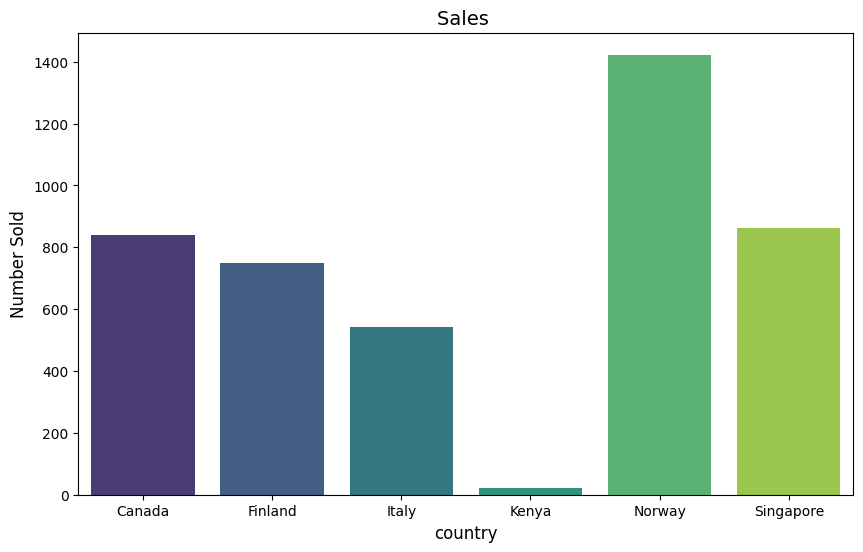

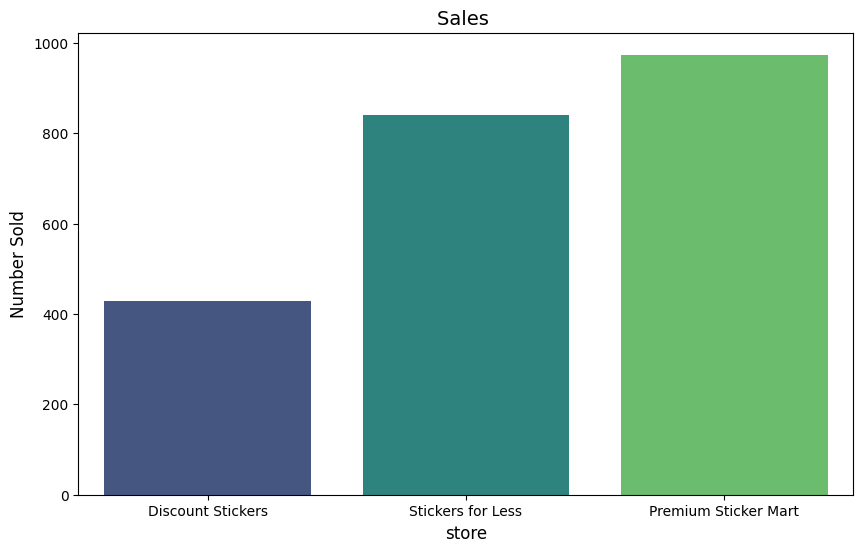

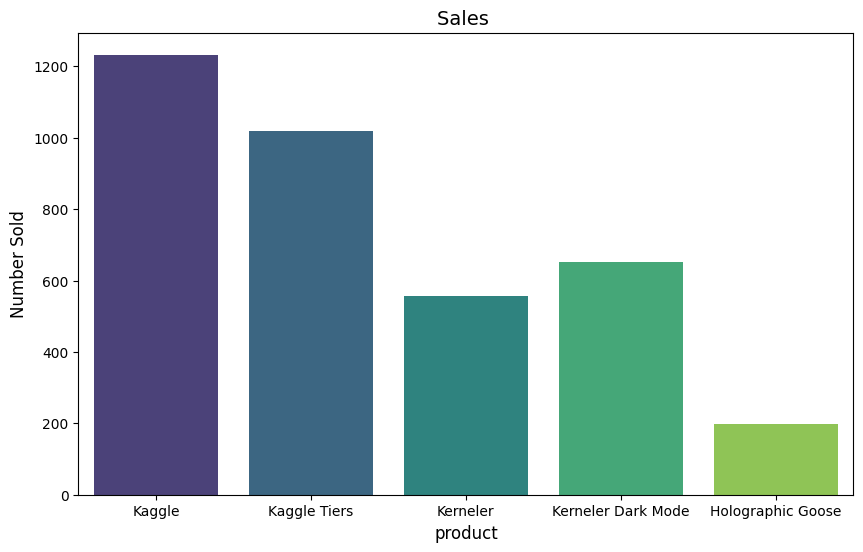

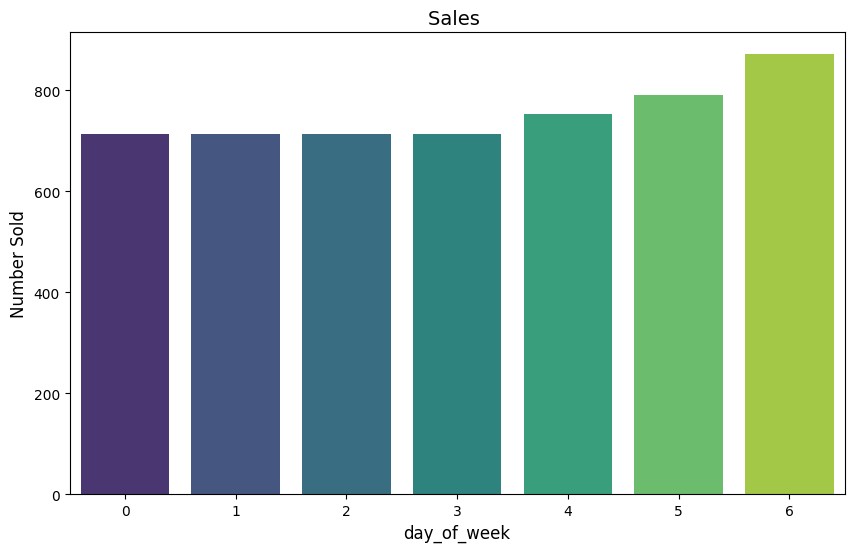

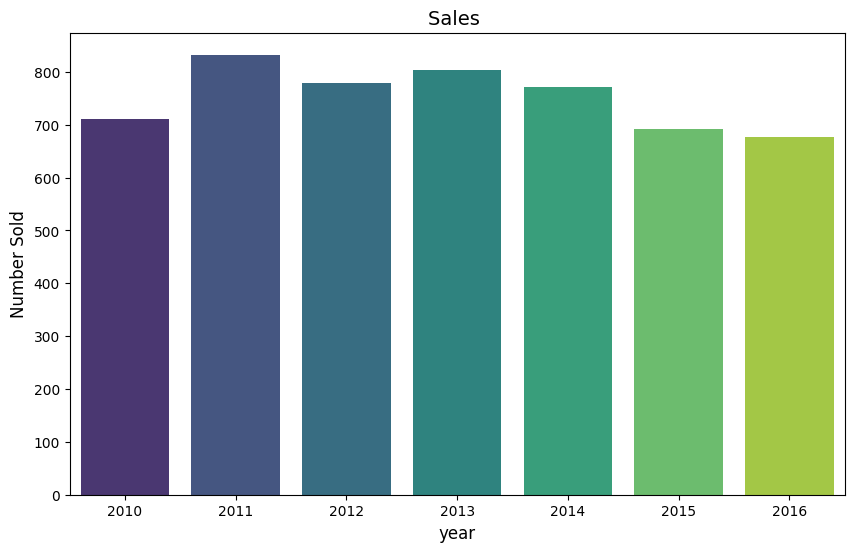

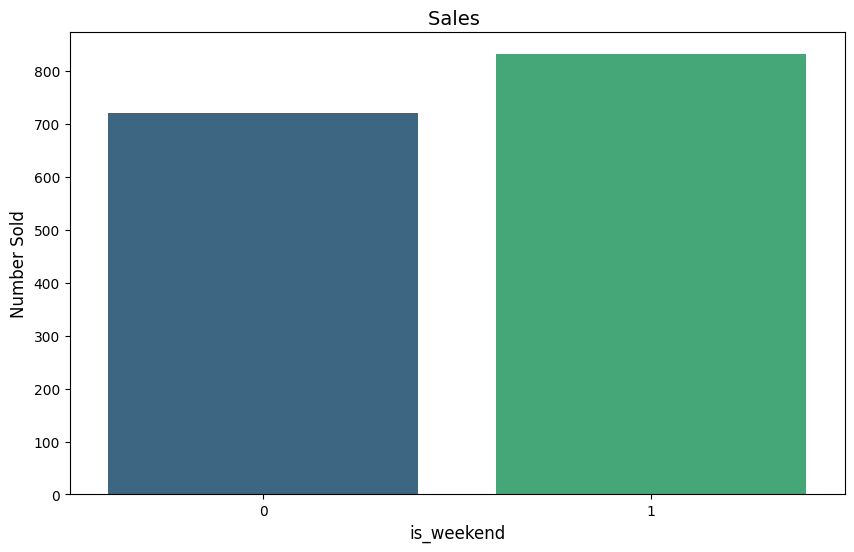

In [11]:
temp_col=["country","store","product","day_of_week","year","is_weekend"]
for col in temp_col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='num_sold', data=df_train, errorbar=None, palette='viridis')
    plt.title('Sales ', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Number Sold', fontsize=12)
    plt.show()

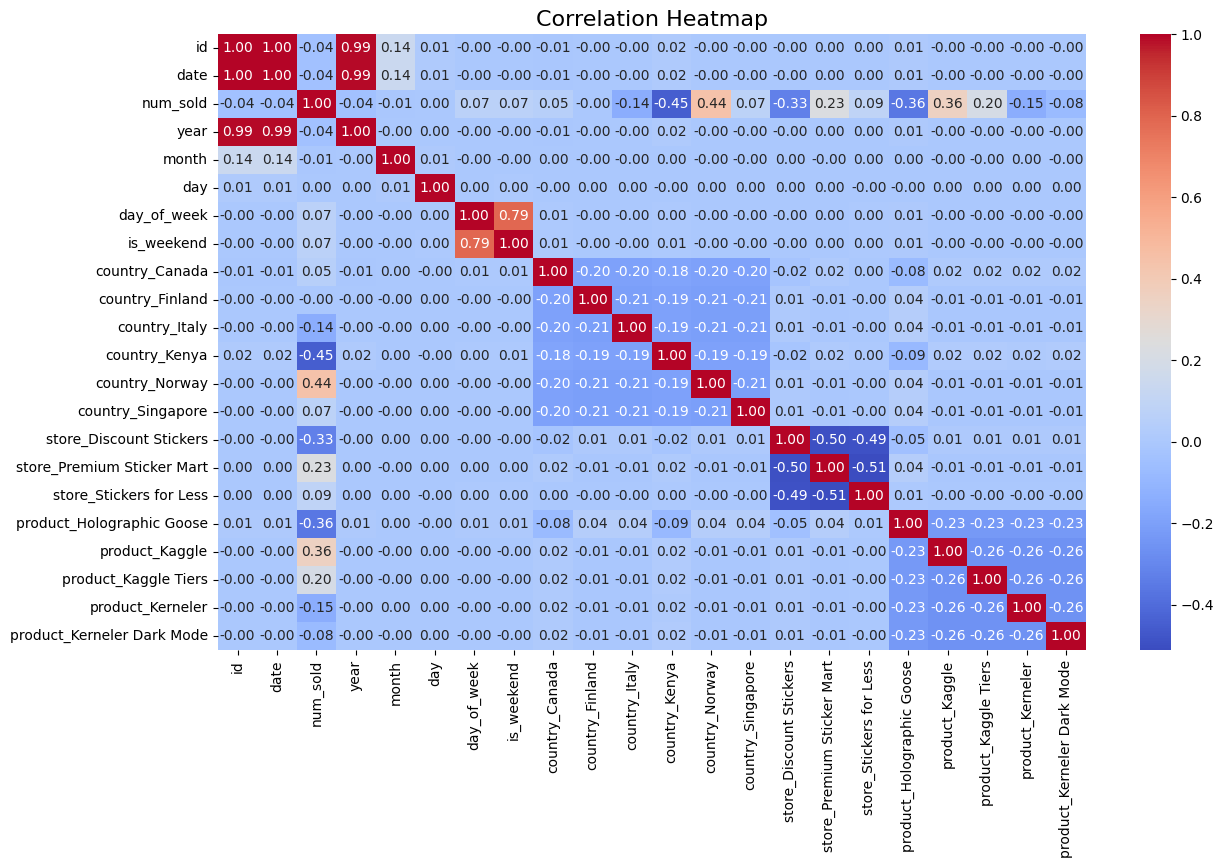

In [12]:
# Correlation Analysis (numerical features)
# Encoding categorical variables to calculate correlation
encoded_train = pd.get_dummies(df_train, columns=['country', 'store', 'product'])
correlation = encoded_train.corr()

# Heatmap of correlation
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [13]:
from sklearn.preprocessing import  OneHotEncoder

# Define columns for encoding
one_hot_cols = ['country', 'store', 'product', 'is_weekend']

# OneHotEncode selected columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df_train[one_hot_cols])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))
one_hot_encoded_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode,is_weekend_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
221254,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
221255,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
221256,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
221257,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
print(one_hot_encoded_df.shape)


(221259, 12)


In [15]:
df_train_temp = df_train.drop(['id','country', 'store', 'product', 'date'], axis=1)
df_train_temp, print(df_train_temp.shape)
# Reset index for both dataframes
df_train_temp = df_train_temp.reset_index(drop=True)
one_hot_encoded_df = one_hot_encoded_df.reset_index(drop=True)

(221259, 6)


In [16]:
encoded_train = pd.concat([df_train_temp, one_hot_encoded_df], axis=1)
print(encoded_train.shape)


(221259, 18)


In [17]:
encoded_train

,num_sold,year,month,day,day_of_week,is_weekend,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode,is_weekend_1
0,973.0,2010,1,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,906.0,2010,1,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,423.0,2010,1,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,491.0,2010,1,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,300.0,2010,1,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221254,466.0,2016,12,31,5,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
221255,2907.0,2016,12,31,5,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
221256,2299.0,2016,12,31,5,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
221257,1242.0,2016,12,31,5,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
from sklearn.feature_selection import mutual_info_regression



X = encoded_train
for col in encoded_train.columns:
    y = encoded_train[col]
    mi = mutual_info_regression(X, y)
    
    # Display Mutual Information
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    print("Mutual Information with "+col)
    print(mi_series)


Mutual Information with num_sold
num_sold                      7.479728
country_Kenya                 0.424113
product_Kaggle                0.123576
country_Norway                0.117302
country_Italy                 0.098473
product_Kaggle Tiers          0.082750
product_Kerneler              0.067283
store_Premium Sticker Mart    0.064318
country_Finland               0.055043
product_Kerneler Dark Mode    0.053388
country_Singapore             0.053157
store_Stickers for Less       0.036279
year                          0.028193
is_weekend                    0.009799
day_of_week                   0.009121
is_weekend_1                  0.006517
month                         0.006390
day                           0.000000
dtype: float64
Mutual Information with year
year                          1.944761
num_sold                      0.026631
country_Kenya                 0.002631
country_Italy                 0.002608
store_Premium Sticker Mart    0.001792
product_Kaggle Tiers      

In [19]:
df_train

,id,date,country,store,product,num_sold,year,month,day,day_of_week,is_weekend
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,4,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,4,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,4,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,4,0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31,5,1
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,31,5,1
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31,5,1
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,31,5,1


In [20]:
print(df_test.isnull().sum())

id         0
date       0
country    0
store      0
product    0
dtype: int64
